In [36]:
import os
import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.rdForceFieldHelpers import UFFOptimizeMolecule
from tqdm import tqdm
import re
import py3Dmol
import subprocess

In [21]:
# bridge_type = 'vp'
# res_path = '../../generation_results/' + bridge_type
# res_path = '../../src/lightning_logs/vp_bridge_2024-05-11_10_25_47.519296/' + bridge_type

root = '../../src/lightning_logs/vp_bridge_egnn_CombinedSparseGraphDataset_2024-07-21_23_58_36.562980'
aromatic = True

res_path = os.path.join(root, 'reconstructed_mols' if not aromatic else 'reconstructed_mols_aromatic_mode')

In [22]:
gen_files = os.listdir(res_path)
len(gen_files)

16052

In [7]:
raw_data_path = '../../data/cleaned_crossdocked_data/raw'

In [8]:
pdb_dict = {}
for directory in os.listdir(raw_data_path):
    dir_path = os.path.join(raw_data_path, directory)
    if os.path.isdir(dir_path):
        # Get the list of files in the directory
        files = os.listdir(dir_path)

        # Add the directory and its files to the dictionary
        pdb_dict[directory] = files

pdb_dict

{'M3K14_HUMAN_321_678_0': ['4idv_B_rec_4idv_13v_lig_tt_min_0.sdf',
  '4idv_13v_lig.pdb',
  '4idt_A_rec_4idv_13v_lig_tt_docked_12.sdf',
  '4idv_B_rec_4idt_t28_lig_tt_min_0.sdf',
  '4dn5_A_rec_4idt_t28_lig_tt_docked_1.sdf',
  '4dn5_A_rec.pdb',
  '4g3d_A_rec_4idv_13v_lig_tt_docked_7.sdf',
  '4idt_A_rec_4idv_13v_lig_tt_min_0.sdf',
  '4idv_B_rec_4idv_13v_lig_tt_docked_0.sdf',
  '4dn5_ags_lig.pdb',
  '4g3d_A_rec_4idt_t28_lig_tt_min_0.sdf',
  '4idt_A_rec.pdb',
  '4idt_A_rec_4idt_t28_lig_tt_min_0.sdf',
  '4g3d_A_rec.pdb',
  '4idt_t28_lig.pdb',
  '4idv_B_rec.pdb',
  '4g3d_A_rec_4idv_13v_lig_tt_min_0.sdf',
  '4dn5_A_rec_4idt_t28_lig_tt_min_0.sdf',
  '4g3d_A_rec_4idt_t28_lig_tt_docked_2.sdf',
  '4idt_A_rec_4idt_t28_lig_tt_docked_0.sdf'],
 'SERA_HUMAN_95_308_0': ['5ofv_B_rec_5nzq_5ao_lig_tt_min_0.sdf',
  '5nzp_B_rec_5ofw_9tw_lig_tt_docked_0.sdf',
  '5nzo_B_rec_5ofm_9tt_lig_tt_min_0.sdf',
  '5nzp_B_rec_5ofv_9tz_lig_tt_min_0.sdf',
  '5nzq_5ao_lig.pdb',
  '5nzo_B_rec_5ofv_9tz_lig_tt_docked_4.sdf',
  

In [9]:
pdb_rev_dict = {v:k for k, files in pdb_dict.items() for v in files}
pdb_rev_dict

{'4idv_B_rec_4idv_13v_lig_tt_min_0.sdf': 'M3K14_HUMAN_321_678_0',
 '4idv_13v_lig.pdb': 'M3K14_HUMAN_321_678_0',
 '4idt_A_rec_4idv_13v_lig_tt_docked_12.sdf': 'M3K14_HUMAN_321_678_0',
 '4idv_B_rec_4idt_t28_lig_tt_min_0.sdf': 'M3K14_HUMAN_321_678_0',
 '4dn5_A_rec_4idt_t28_lig_tt_docked_1.sdf': 'M3K14_HUMAN_321_678_0',
 '4dn5_A_rec.pdb': 'M3K14_HUMAN_321_678_0',
 '4g3d_A_rec_4idv_13v_lig_tt_docked_7.sdf': 'M3K14_HUMAN_321_678_0',
 '4idt_A_rec_4idv_13v_lig_tt_min_0.sdf': 'M3K14_HUMAN_321_678_0',
 '4idv_B_rec_4idv_13v_lig_tt_docked_0.sdf': 'M3K14_HUMAN_321_678_0',
 '4dn5_ags_lig.pdb': 'M3K14_HUMAN_321_678_0',
 '4g3d_A_rec_4idt_t28_lig_tt_min_0.sdf': 'M3K14_HUMAN_321_678_0',
 '4idt_A_rec.pdb': 'M3K14_HUMAN_321_678_0',
 '4idt_A_rec_4idt_t28_lig_tt_min_0.sdf': 'M3K14_HUMAN_321_678_0',
 '4g3d_A_rec.pdb': 'M3K14_HUMAN_321_678_0',
 '4idt_t28_lig.pdb': 'M3K14_HUMAN_321_678_0',
 '4idv_B_rec.pdb': 'M3K14_HUMAN_321_678_0',
 '4g3d_A_rec_4idv_13v_lig_tt_min_0.sdf': 'M3K14_HUMAN_321_678_0',
 '4dn5_A_rec_

In [10]:
len([file for file in gen_files if file in pdb_rev_dict.keys()])

25095

In [11]:
one = gen_files[765]
ligand_name = one.split('.')[0]

In [12]:
pattern = r"(\w+_[A-Z]_rec)"
match = re.search(pattern, one)
match.group(1)

'3s1h_A_rec'

In [13]:
ligand_file = os.path.join(res_path, one)
ligand_file

'../../src/lightning_logs/vp_bridge_egnn_CombinedSparseGraphDataset_2024-07-21_23_58_36.562980/reconstructed_mols/3s1h_A_rec_2w05_frt_lig_tt_min_0.sdf'

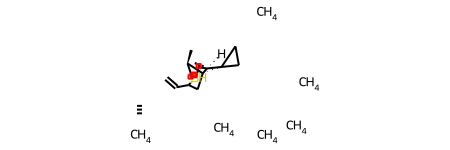

In [31]:
m = Chem.MolFromMolFile(ligand_file)
m

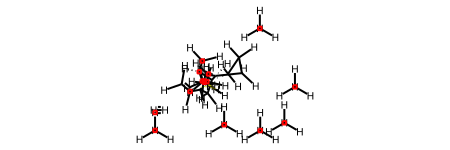

In [32]:
m = Chem.AddHs(m, addCoords = True)
m

[14:14:21] UFFTYPER: Unrecognized atom type: S_5+4 (21)


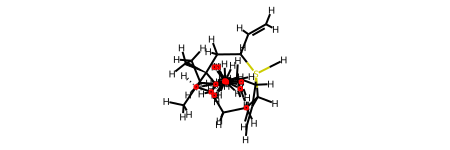

In [37]:
AllChem.EmbedMolecule(m)
m

[14:14:30] UFFTYPER: Unrecognized atom type: S_5+4 (29)


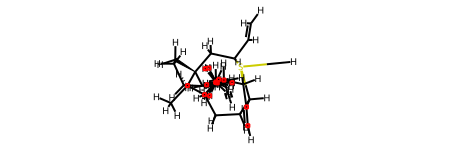

In [38]:
UFFOptimizeMolecule(m)
m

In [14]:
pdb_folder = pdb_rev_dict[one]
pr_pdb = match.group(1)
protein_file = os.path.join(raw_data_path, pdb_folder, pr_pdb + '.pdb')
autobox_ligand_file = os.path.join(raw_data_path, pdb_folder, one)
print(protein_file, autobox_ligand_file)

../../data/cleaned_crossdocked_data/raw/CDK2_HUMAN_1_298_0/3s1h_A_rec.pdb ../../data/cleaned_crossdocked_data/raw/CDK2_HUMAN_1_298_0/3s1h_A_rec_2w05_frt_lig_tt_min_0.sdf


In [15]:
# log_path = '../../docking_res/logs/' + bridge_type
# out_path = '../../docking_res/output/' + bridge_type

# log_path = '../../src/lightning_logs/vp_bridge_2024-05-11_10_25_47.519296/logs/' + bridge_type
# out_path = '../../src/lightning_logs/vp_bridge_2024-05-11_10_25_47.519296/output/' + bridge_type

log_path = os.path.join(root, 'logs') if not aromatic else os.path.join(root, 'logs_aromatic')
out_path = os.path.join(root, 'output') if not aromatic else os.path.join(root, 'output_aromatic')
os.makedirs(log_path, exist_ok=True)
os.makedirs(out_path, exist_ok=True)

log_file = os.path.join(log_path, ligand_name + '.log')
out_file = os.path.join(out_path, ligand_name + '.sdf')
subprocess.run(['gnina', '-r', protein_file, '-l', ligand_file, '--autobox_ligand', autobox_ligand_file, '-o', out_file, '--exhaustiveness', '16', '--log', log_file, '-q'], stdout=subprocess.DEVNULL)

*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders



CompletedProcess(args=['gnina', '-r', '../../data/cleaned_crossdocked_data/raw/CDK2_HUMAN_1_298_0/3s1h_A_rec.pdb', '-l', '../../src/lightning_logs/vp_bridge_egnn_CombinedSparseGraphDataset_2024-07-21_23_58_36.562980/reconstructed_mols/3s1h_A_rec_2w05_frt_lig_tt_min_0.sdf', '--autobox_ligand', '../../data/cleaned_crossdocked_data/raw/CDK2_HUMAN_1_298_0/3s1h_A_rec_2w05_frt_lig_tt_min_0.sdf', '-o', '../../src/lightning_logs/vp_bridge_egnn_CombinedSparseGraphDataset_2024-07-21_23_58_36.562980/output/3s1h_A_rec_2w05_frt_lig_tt_min_0.sdf', '--exhaustiveness', '16', '--log', '../../src/lightning_logs/vp_bridge_egnn_CombinedSparseGraphDataset_2024-07-21_23_58_36.562980/logs/3s1h_A_rec_2w05_frt_lig_tt_min_0.log', '-q'], returncode=0)

In [16]:
v = py3Dmol.view()
v.addModel(open(protein_file).read())
v.setStyle({'cartoon':{},'stick':{'radius':.1}})
v.addModel(open(autobox_ligand_file).read())
v.setStyle({'model':1},{'stick':{'colorscheme':'dimgrayCarbon','radius':.125}})
v.addModelsAsFrames(open(out_file).read())
v.setStyle({'model':2},{'stick':{'colorscheme':'greenCarbon','radius':.125}})
v.zoomTo({'model':1})
v.rotate(90)
v.animate({'interval':1000})

3Dmol.js failed to load for some reason. Please check your browser console for error messages.